---
# Python - Stack & Queue
* Stack 사용 시 그냥 list를 활용
    - stack = []
    - stack.append(4)
    - stack.pop()      # 최상단 원소 제거
    
* Queue 사용 시 라이브러리 활용 <중요>
    - from collections import deque
    - queue = deque()   # 큐 생성
    - queue.append(5)
    - queue.popleft()   # 가장 먼저 들어온 데이터 삭제
    - queue.reverse()   # 큐 내용물을 역순으로 바꾸기
    
---

# 재귀 함수(Recursive Function) 활용

### #. 최대공약수 계산(유클리드 호제법)
* 두 자연수 A, B에 대하여 (A>B) A를 B로 나눈 나머지를 R이라고 한다.
* 이때 A와 B의 최대공약수는 B와 R의 최대공약수와 같다.
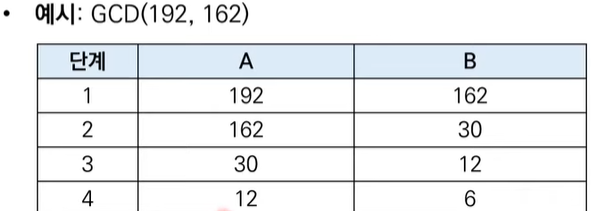
        
        => 192와 162의 최대공약수는 6

In [1]:
""" 유클리드 호제법 """

def gcd(a, b):
    if a % b == 0:
        return b
    else:
        return gcd(b, a % b)

print(gcd(192, 162))

6


---
---

# DFS 
### (ㅡ> 인접 노드를 한 개만 Stack에)
### (ㅡ> 재귀호출 사용)
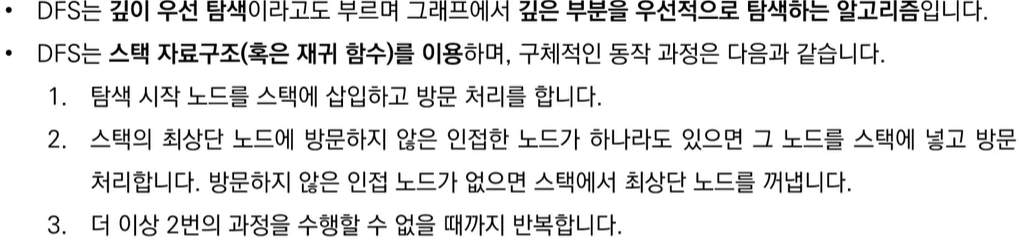

In [7]:
""" Python """

def dfs(graph, v, visited):
    # 3. 방문한 노드 체크
    visited[v] = True
    print(v, end=' ')
    
    # 4. 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    # 재귀호출!! (<-> BFS)
    for i in graph[v]:
        if not visited[i]:            # not 연산자<중요>
            dfs(graph, i, visited)


# 1. Input graph : 각 노드가 연결된 정보를 표현(2차원 리스트)
graph = [
    [],           # 보통 1번부터 있기 때문에 인덱스 0번은 비워둠
    [2,3,8],      # 2번 노드(에 연결된 노드들)
    [1,7],        # 3번 노드
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

# 2. 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9         # 리스트 인덱스 0부터 시작이기 때문에 9개

dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

In [4]:
''' 내가 짠 코드 '''

def dfs(graph, v, visited):
    if visited[v] == False:
        visited[v] = True
        print(v, end=' ')
        for i in graph[v]:
            dfs(graph, i, visited)

In [5]:
graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

visited = [False]*9

dfs(graph, 1, visited)


1 2 7 6 8 3 4 5 

---
---

# BFS 
### (ㅡ> 인접 노드를 전부 Queue에)
### (ㅡ> deque 라이브러리 사용)
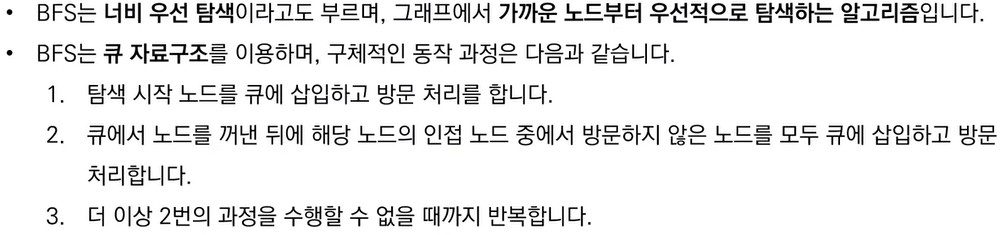

In [8]:
''' Python '''

from collections import deque

def bfs(graph, start, visited):
    
    # 3. BFS를 위해 큐(Queue) 생성
    queue = deque([start])    #  parameter node 하나를 큐에 넣음
    
    # 해당 방문한 노드 체크 
    visited[start] = True
    
    # 4. 큐가 빌 때까지 반복!!
    while queue:
        # 5. 큐에서 하나의 원소를 뽑아 출력
        v = queue.popleft()
        print(v, end=' ')
        
        # 6. 아직 방문하지 않은 인접 원소를 "전부" 큐에 삽입
        # 큐에 삽입한건 모두 방문처리함!!! (너비우선<->깊이우선_하나씩)
        # 그래서 재귀호출 X !!!  (<-> DFS)
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)            # 방문 안한 노드 넣어주고
                visited[i] = True          # 넣은건 바로 체크(=방문)


# 1. Input graph : 각 노드가 연결된 정보를 표현(2차원 리스트)
graph = [
    [],           # 보통 1번부터 있기 때문에 인덱스 0번은 비워둠
    [2,3,8],      # 2번 노드(에 연결된 노드들)
    [1,7],        # 3번 노드
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

# 2. 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9         # 리스트 인덱스 0부터 시작이기 때문에 9개

bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

In [6]:
''' 내가 짠 코드 '''
from collections import deque

queue = deque()

def bfs(graph, v, visited):    
    if visited[v] == False:
        visited[v] = True
        print(v, end=' ')
    
        for i in graph[v]:            # 이웃 노드를 다 넣어주는게 핵심이다
            if visited[i] == False:   # 불필요한 탐색 횟수 제거
                queue.append(i)
    
    if len(queue) > 0:
        bfs(graph, queue.popleft(), visited)


In [7]:
graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

visited = [False]*9

bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

---
---


## <문제 1> 음료수 얼려 먹기
* 문제 설명
    - N x M 크기의 얼음 틀이 있다. 구멍이 뚫린 부분은 0, 칸만기아 존재하는 부분은 1로 표시된다.
    - 구멍이 뚫린 부분끼리 상,하,좌,우로 붙어 있는 경우 서로 연결되어 있는 것으로 간주한다.
    - 이때, ***얼음 틀의 모양이 주어졌을 때 생성되는 총 아이스크림의 개수를 구하는 프로그램을 작성***해라
    
    - EX) 다음 4 x 5얼음 틀 예시에선 아이스크림이 총 3개 생성됨
        - 파란색 뭉텅이 3개
    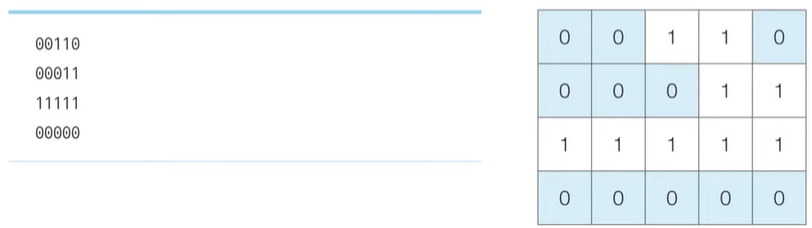
    
---
* 문제 해결 아이디어
    - DFS, BFS로 해결 가능
    - 얼음을 얼릴 수 있는 공간이 상,하,좌,우로 연결되어 있다고 표현할 수 있으므로, 그래프 형태로 모델링 할 수 있다. 아래와 같이 3 x 3으로 가정해본다.
    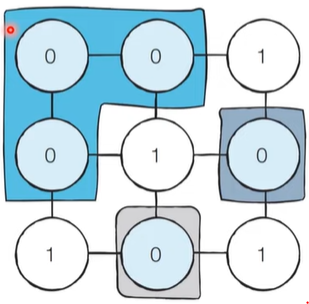
    
    - DFS
        1. <u>특정 지점의 주변 상,하,좌,우가 좌표범위를 넘지 않는지 살펴본 뒤</u> <u>주변 지점중에서 값이 '0'이면서 아직 방문하지 않은 지점</u>이 있다면 해당 지점을 방문
        2. <u>방문한 지점에서 다시</u> 상,하,좌,우를 살펴보면서 방문을 진행하는 과정을 반복하면, ***연결된 모든 지점을 방문***할 수 있음
        3. 모든 노드에 대해 1~2번 과정을 반복하여, <u>방문하지 않은 지점의 수를 카운트</u>
        
        

In [ ]:
''' Python '''

def dfs(x, y):
    # n x m을 벗어나면 즉시 종료
    if x<0 or y<0 or x>=n or y>=m: 
        return False
    
    # 현재 노드를 아직 방문하지 않았다면
    if graph[x][y] == 0:
        graph[x][y] == 1   #우선, 방문햇으니 체크하고 <중요!!!!>
        
        # (x,y)의 주변 상,하,좌,우 모두 재귀적으로 "D"FS 수행
        dfs(x-1, y)    # 상   # "D"니까 끝까지 쭉 내려감
        dfs(x, y-1)    # 좌
        dfs(x+1, y)    # 하
        dfs(x, y+1)    # 우
        
        # "D"FS니까 재귀호출로 방문 안한 맨 끝까지 방문한 다음에
        # 해당 노드가 '0'이니, 한 번이라도 방문(=얼음생성)했으므로 True 리턴해서 종료
        return True
    
    return False


# n x m 입력 받기
n, m = map(int, input().split())

# n x m 2차원 리스트-맵 데이터 입력 받기 <중요>
graph = []
for i in range(n):
    graph.append(list(map(int, input())))  # <중요>


# 비어있는 모든 노드(위치)에 DFS로 음료수를 채우자
result = 0
for i in range(n):
    for j in range(m):
        # (i, j) 위치에서 "if"문으로 바로 DFS 수행 <중요>
        if dfs(i, j) == True:
            result += 1
        
print(result)